# Introduction to Machine Learning<br><br>Day 03:<br>Text Classification

<center>Dr. William Mattingly<br>
TAP Institute with JSTOR</center>

1) What is text classification?<br>
2) When should I use text classification?<br>
3) spaCy's Text Classification Pipeline<br>
4) Resources for future exploration of ML

## Preface

This notebook will introduce the reader to more complex elements of machine learning through text classification. It will introduce the reader to new key terms, such as prediction, generalization, and accuracy metrics.

## Background - Supervised Learning

Imagine we have an individual named Laura. Laura enjoys music. Now, in this scenario, we do not know what genre of music that she likes, rather we know the features of the music she likes. She enjoys fast tempo music with upbeat melodies. If we were to ask her to rate the song below, do we know what she would say about it on a scale of 1 (likes) and 0 (dislikes)?

In [1]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/GF0I0fHBMKA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

c:\users\wma22\appdata\local\programs\python\python39\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


It was likely easy for you to say that she would probably enjoy it. It has a fast tempo and is upbeat. You have used her past experiences with music to make a prediction on unseen data. You have done this inuitively. Now, what if the song was a little different. What if it had a mild tempo, but upbeat sound? In this scenario, it would be harder to make an accurate prediction and this is where machine learning comes into play. It allows us to use algorithms to solve more complex problems. If we had enough data on Laura's music history, we could use a supervised learning approach to know what she likes and dislikes to make a more accurate guess.

Text is, however, vastly more complicated beecause theree are a myriad of features to language.

## Part One - Introduction to Text Classification

In the last notebook, we engaged in a form of unsupervised learning. We allowed a system to take unstructured data and assign 20 categories to it. In this notebook, we will explore a different method of machine learning known as supervised learning. As noted in notebook 1, supervised learning is when we know the structure of our data. We have labels that correspond to that data and we leverage that knowledge to train a computer system to assign the same labels to similar unknown data. In NLP, text classification is a form of supervised learning.

Classification tasks fall into roughly three categories:

1) binary classification<br>
2) multiclass classification<br>
3) multilabel classification

The differences will not be explored in great detail here as we will be dealing primarily with binary text classification. You should, however, be familiar with these three categories as you will choose different approaches to solve different problems.

<b>Binary classification</b> is when a model has the ability to choose between two labels, a 0 and a 1. These numbers stand for a specific label. If we were to create a positive/negative review classifier (a common introducutory ML task), then 0 could be negative and 1 could be positive. After training, the model will see the entire world as either being positive or negative and when it encounters a new text, it will assign a float, or floating number (decimal) to that text. This is known as a <b>prediction</b>. The closer this prediction is to 0 or 1 indicates the degree to which the text at hand is positive or negative.

<b>Multiclass classification</b> is when a model is designend to handle multiple potential labels. If we are trying to determine if a piece of text is a letter, movie review, or tax form, wew will have three potential labels (letter, movie_review, tax_form). The model will make a prediction based on its experiences during training to determine which of the texts it falls under. In multiclass classification, there can be only one label.

<b>Multilabel classification</b> is like multiclass classification, except a text can have multiple labels. This is useful if you expect there to be multiple potential labels for texts in your corpus. Imagien if you have a text that is a letter in nature, but deals partially about a movie that the writer saw a few days earlier. A prediction of letter would be accurate as would movie_review, but a multiclass classification model cannot make these nuances known. A multilabel classification model can. Its output will look somewhat similar to a binary classification model for each potential label, so it may be (letter: 0.5030030, movie_review: 0.4020039, tax_form: 0.00002). This output captures the degree to which the text fits the form of a letter, but deals with the subject of a movie.

The selection of prediction type affects the activation function used in the final layer of a neural network. An <b>activation function</b> is an output node in a neural network that determins the prediction. It is beyond the scope of these notebooks to cover this.

## Part Two - When to Use Text Classification

Text classification should be used when you either have access to a dataset with labels or intend to cultivate a dataset with labels. In my experience, text classification tends to achieve better results with texts that are longer (500+words).

## Part Three - How to Collate Training Data

For the digitial humanities, one of the largest problems is access to data. Unlike other industries and disciplines, the reliance on data came late to the humanities. As a result, few well-cultivated datasets exist. This means that the humanist who wishes to apply machine learning to their research, must not only be able to do so, but must also be familiar with how to collate good training data.

In the last notebook, we used an off-the-shelf dataset. In real life, you will never have such a resource. There is no collection of labeled data for 13th century French literature (at least I don't think there is). For this reason, this notebook will spend the majority of the time collating a dataset from scratch for text classification.

There are two main approaches to collating a good dataset.
1) Manual annotation<br>
2) Rules-Based annotation with manual validation<br>

Manual annotations offer a guarantee that the dataset is 100% accurate. It is often good to have a <b>domain expert</b> do the annotations or validate them to ensure its accuracy. To produce a good binary classification model, one will need 200-500 samples minimum for each label. With harder classification problems, you will find that you need more.

In some circumstances, it is infeasible, unrealistic, or too expensive to gather that much training data. Think of a 50-class classification model. That would require someone to manually annotate around 50,000 texts. In these scenarios, the practitioner can apply several tricks to rapidly cultivate a training set through a series of rules. The training set should then be manually validated by an expert. This approach is particularly useful if you do not know if a machine learning approach is even possible for the question you are asking.

Because this is a short notebook, let's apply the latter and avoid having a content expert validate the results.

## Part Four - Introduction to spaCy's Text Classification Pipeline

In [1]:
import spacy
from spacy.tokens import DocBin
import json

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [3]:
train_data = load_data("./data/training_data.json")
valid_data = load_data("./data/val_data.json")

In [4]:
print (f"Lenght of Training Data is: {len(train_data)}")
print (f"Lenght of Training Data is: {len(valid_data)}")

Lenght of Training Data is: 800
Lenght of Training Data is: 198


In [5]:
print (train_data[0])

['And it, it was a lot of noise, a lot of injuries, a smell of, of the stench of, of gunpowder and, and corpses came closer, you know? War has a certain smell, a very very unpleasant smell that you can really honestly feel.', 0]


In [6]:
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.3.1
    Uninstalling en-core-web-sm-2.3.1:
      Successfully uninstalled en-core-web-sm-2.3.1
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-06-23 15:04:39.937322: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
You should consider upgrading via the 'C:\Users\wma22\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
def make_docs(data):
    docs = []
    for doc, label in nlp.pipe(data, as_tuples=True):
        if label == 0:
            doc.cats["hunger"] = 0
            doc.cats["smell"] = 1
        else:
            doc.cats["hunger"] = 1
            doc.cats["smell"] = 0
        docs.append(doc)
    return (docs)

In [34]:
hunger = train_data[401:]
smell = train_data[:400]

hunger_training = hunger[:100]
smell_training = smell[:100]
combined_training = hunger_training+smell_training

train_docs = make_docs(combined_training)
doc_bin = DocBin(docs=train_docs)
doc_bin.to_disk("./data/train_hs.spacy")

valid_docs = make_docs(valid_data[:num_texts])
doc_bin = DocBin(docs=valid_docs)
doc_bin.to_disk("./data/valid_hs.spacy")

In [9]:
!python -m spacy init fill-config ./base_config.cfg ./config.cfg

[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


2021-06-23 15:05:53.351122: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll


In [35]:
!python -m spacy train config.cfg --output ./output

[i] Using CPU

2021-06-23 15:14:20.287730: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
[2021-06-23 15:14:24,274] [INFO] Set up nlp object from config
[2021-06-23 15:14:24,274] [INFO] Pipeline: ['tok2vec', 'textcat']
[2021-06-23 15:14:24,274] [INFO] Created vocabulary
[2021-06-23 15:14:24,274] [INFO] Finished initializing nlp object
[2021-06-23 15:14:24,870] [INFO] Initialized pipeline components: ['tok2vec', 'textcat']




=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'textcat']
[i] Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ------------  ----------  ------
  0       0          0.00          0.12       33.33    0.33
  1     200          0.00         29.34       82.61    0.83
  3     400          0.00          2.47       85.77    0.86
  6     600          0.00          0.52       86.73    0.87
 10     800          0.00          0.27       87.28    0.87
 14    1000          0.00          0.12       85.81    0.86
 20    1200          0.00          0.06       86.28    0.86
 27    1400          0.00          0.04       86.86    0.87
 36    1600          0.00          0.02       87.28    0.87
 46    1800          0.00          0.01       87.28    0.87
 60    2000          0.00    

In [36]:
trained_classifier = spacy.load("output/model-best")

In [83]:
sample_text = train_data[200]
print (sample_text)

["I don't recall how long they were aging but that smell and that wonderful aroma contributed from the honey it was still there.", 0]


In [81]:
doc = trained_classifier(sample_text[0])

{'hunger': 0.498866468667984, 'smell': 0.5011335611343384}


In [67]:
hunger_testing = hunger[101:]
smell_testing  = smell[101:]
combined_testing = hunger_testing+smell_testing


In [68]:
actual = []
predicted = []
for example in combined_testing:
    if example[1] == 1:
        actual.append("hunger")
    else:
        actual.append("smell")
    doc = trained_classifier(example[0])
    if doc.cats["hunger"] >.5:
        predicted.append("hunger")
    else:
        predicted.append("smell")

In [69]:
print (len(predicted))

597


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [70]:
cm = confusion_matrix(actual,predicted)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Test Set Accuracy Score :\n {accuracy_score(actual,predicted)}\n')

Confusion Matrix :
 [[289   9]
 [ 20 279]]

Test Set Accuracy Score :
 0.9514237855946399



In [63]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

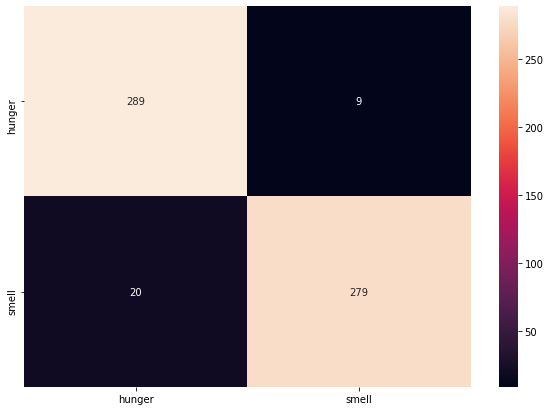

In [72]:
plt.figure(figsize = (10,7))
df_cm = pd.DataFrame(cm, index = ["hunger", "smell"],
                  columns = ["hunger", "smell"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

## Conclusion

## Resources for Further work with Machine Learning